In [1]:
import pandas as pd
from Bio import Restriction, SeqIO
from ntaxon.fingerprinting.rflp import RestrictionDigestion
import os
import pandas as pd

In [2]:
main_accessions = pd.read_csv('./data/ref_seq_accessions.csv')
main_accessions.drop("Unnamed: 0", inplace=True, axis=1)
main_accessions.head()

,accession,species,sequence
0,NR_025227.1,Pseudomonas umsongensis,AACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGATGAAGAG...
1,NR_157609.1,Bacillus haynesii,AGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAATA...
2,NR_116064.1,Curtobacterium oceanosedimentum,GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGATGAT...
3,NR_104839.1,Curtobacterium oceanosedimentum,TCAGGACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGA...
4,NR_115988.1,Acinetobacter rudis,CCAGGGATTTGATTATGGCTCAGATTGAACGCTGGCGGCAGGCTTA...


In [3]:
# Fetch similar accessions
similar_accessions = pd.DataFrame(columns=['accession', 'strain_ref', 'sequence'])
for root, dirs, files in os.walk("./data/similar_ref_seq", topdown=False):
    for file in files:
        filepath = f"./data/similar_ref_seq/{file}"
        if file.endswith('.fasta') and os.path.isfile(filepath):
            records = list(SeqIO.parse(filepath, 'fasta'))
            for r in records:
                similar_accessions = similar_accessions.append({
                    "accession": r.id,
                    "strain_ref": os.path.splitext(file)[0],
                    "sequence": str(r.seq)
                }, ignore_index=True)

similar_accessions.head()

,accession,strain_ref,sequence
0,MN513225.1,NR_025357.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...
1,JF710959.1,NR_025357.1,TACACATGCAAGTCGAACGGCAGCACGAGAGAGCTTGCTCTCTTGG...
2,KT988067.1,NR_025357.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...
3,KP224304.1,NR_025357.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...
4,KF534470.1,NR_025357.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...


In [4]:
main_indexed_accessions = main_accessions.set_index("accession")
main_indexed_accessions.head()

,species,sequence
accession,,
NR_025227.1,Pseudomonas umsongensis,AACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGATGAAGAG...
NR_157609.1,Bacillus haynesii,AGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAATA...
NR_116064.1,Curtobacterium oceanosedimentum,GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGATGAT...
NR_104839.1,Curtobacterium oceanosedimentum,TCAGGACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGA...
NR_115988.1,Acinetobacter rudis,CCAGGGATTTGATTATGGCTCAGATTGAACGCTGGCGGCAGGCTTA...


In [5]:
# Assign Species
similar_accessions['species'] = similar_accessions.apply(lambda c: main_indexed_accessions.loc[c.strain_ref].species, axis=1)
similar_accessions.head()

,accession,strain_ref,sequence,species
0,MN513225.1,NR_025357.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,Alcaligenes faecalis
1,JF710959.1,NR_025357.1,TACACATGCAAGTCGAACGGCAGCACGAGAGAGCTTGCTCTCTTGG...,Alcaligenes faecalis
2,KT988067.1,NR_025357.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,Alcaligenes faecalis
3,KP224304.1,NR_025357.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,Alcaligenes faecalis
4,KF534470.1,NR_025357.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,Alcaligenes faecalis


In [6]:
# All availabe Species
similar_accessions['species'].unique()

array(['Alcaligenes faecalis'], dtype=object)

In [7]:
# Import sample sequences
sample_sequences = pd.read_csv('./outputs/accession_details_all.csv')
sample_sequences.head()

,accession,isolate,sequence,species,genera,phylum
0,MN493874.1,K2,AAGGGGTGGCCTACACATGCAAGTCGAACGGCAGCACAGGAGAGCT...,Stenotrophomonas maltophilia,Stenotrophomonas,Proteobacteria
1,MN493875.1,K4,GGCGCAGGCCTACACATGCAAGTCGAACGAACTCTTCGGAGTTAGT...,Brevundimonas naejangsanensis,Brevundimonas,Proteobacteria
2,MN493876.1,K7,AATGCGGGGCCTACACATGCAAGTCGAACGGCAGCACAGGAGAGCT...,Stenotrophomonas pavanii,Stenotrophomonas,Proteobacteria
3,MN493877.1,K9,CCAAGGGCGGCCTTACCATGCAAGTCGAGCGCCCCGCAAGGGGAGC...,Ochrobactrum anthropi,Ochrobactrum,Proteobacteria
4,MN493878.1,K10,GCAGCTTACCATGCAAGTCGAGCGCCCCGCAAGGGGAGCGGCAGAC...,Ochrobactrum anthropi,Ochrobactrum,Proteobacteria


# Start Haplotype Analysis

In [8]:
#Analyse Species Wise
SPECIES = 'Alcaligenes faecalis'

In [9]:
# Filter sample sequences
sp_sample_sequences = sample_sequences[sample_sequences['species'] == SPECIES]

# Add a identifier column
sp_sample_sequences['identifier'] = 'SAMP_' + sp_sample_sequences[['accession']]

sp_sample_sequences.head()

<ipython-input-9-8e03085a45b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_sample_sequences['identifier'] = 'SAMP_' + sp_sample_sequences[['accession']]


,accession,isolate,sequence,species,genera,phylum,identifier
7,MN493881.1,K13,ATGCAAGTCGAACGGCAGCGCGAGAGAGCTTGCTCTCTTGGCGGCG...,Alcaligenes faecalis,Alcaligenes,Proteobacteria,SAMP_MN493881.1
8,MN493882.1,K14,CCATGCAAGTCGAACGGCAGCGCGAGAGAGCTTGCTCTCTTGGCGG...,Alcaligenes faecalis,Alcaligenes,Proteobacteria,SAMP_MN493882.1
12,MN493886.1,K19,CGGAGCTTTCACATGCAAGTCGAACGGCAGCGCGAGAGAGCTTGCT...,Alcaligenes faecalis,Alcaligenes,Proteobacteria,SAMP_MN493886.1
13,MN493887.1,K20,CGGGAGCTTTCACATGCAAGTCGAACGGCAGCGCGAGAGAGCTTGC...,Alcaligenes faecalis,Alcaligenes,Proteobacteria,SAMP_MN493887.1
26,MN493901.1,K44,GGAGCCTTACCATGCAAGTCGAACGGCAGCGCGAGAGAGCTTGCTC...,Alcaligenes faecalis,Alcaligenes,Proteobacteria,SAMP_MN493901.1


In [10]:
entries = similar_accessions[similar_accessions['species'] == SPECIES][['accession', 'sequence']]

# Append from existing records
entries = entries.append(
    main_indexed_accessions[main_indexed_accessions['species'] == SPECIES].reset_index()[['accession', 'sequence']]
, ignore_index=True)

# Add a identifier column
entries['identifier'] = 'REF_' + entries[['accession']]
entries.head()

,accession,sequence,identifier
0,MN513225.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,REF_MN513225.1
1,JF710959.1,TACACATGCAAGTCGAACGGCAGCACGAGAGAGCTTGCTCTCTTGG...,REF_JF710959.1
2,KT988067.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,REF_KT988067.1
3,KP224304.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,REF_KP224304.1
4,KF534470.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,REF_KF534470.1


In [11]:
entries_merged = entries.append(sp_sample_sequences[['accession', 'sequence', 'identifier']], ignore_index=True)
#entries_merged['sequence'] = entries_merged['sequence'].str.strip()
entries_merged.head()

,accession,sequence,identifier
0,MN513225.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,REF_MN513225.1
1,JF710959.1,TACACATGCAAGTCGAACGGCAGCACGAGAGAGCTTGCTCTCTTGG...,REF_JF710959.1
2,KT988067.1,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,REF_KT988067.1
3,KP224304.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,REF_KP224304.1
4,KF534470.1,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,REF_KF534470.1


In [12]:
# entries_merged.groupby('accession').count().reset_index()

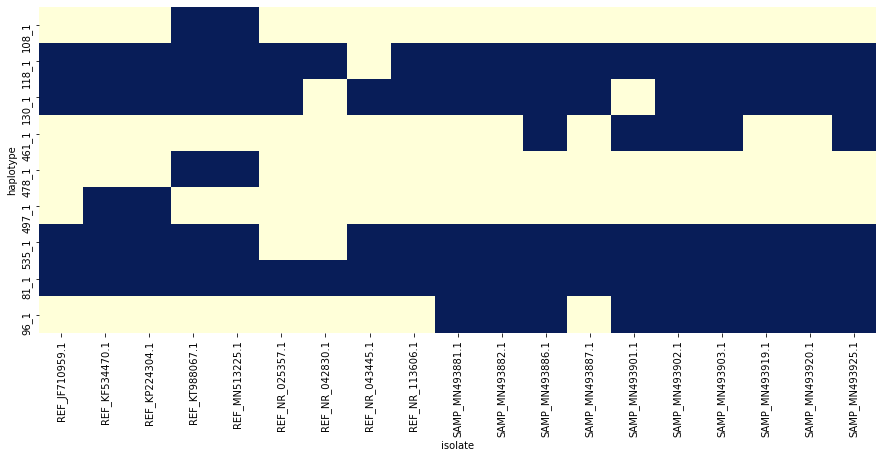

In [13]:
# Perform restriction Digestion
mspI_digestion = RestrictionDigestion(
    accessions=entries_merged, 
    enzyme=Restriction.MspI, 
    label_col="identifier",
    sequence_col="sequence"
)

matrix = mspI_digestion.digestion_profile()

# Binary Matrix
matrix_bin = matrix.get_binary_matrix() 

mspI_digestion.plot_electrophoretic_diagram(
    min_frequency=1, 
    min_common_haplotye=5, 
    min_size=50, 
    figsize=(15, 6), 
    size_tolerance=6
#    lane_order=col_names_reordered
)

# Calculate Size Tolerance

In [14]:
fragments = []
for f in matrix_bin.index.values.to_list():
    # get the size by spliting across _
    splitted = f.split('_')
    fragments.append([f, splitted[0]])
fragments

[['543_1', '543'],
 ['535_1', '535'],
 ['534_1', '534'],
 ['497_1', '497'],
 ['478_1', '478'],
 ['476_1', '476'],
 ['475_1', '475'],
 ['470_1', '470'],
 ['463_1', '463'],
 ['462_1', '462'],
 ['461_1', '461'],
 ['456_1', '456'],
 ['452_1', '452'],
 ['451_1', '451'],
 ['449_1', '449'],
 ['442_1', '442'],
 ['143_1', '143'],
 ['130_1', '130'],
 ['129_1', '129'],
 ['128_1', '128'],
 ['124_1', '124'],
 ['119_1', '119'],
 ['118_1', '118'],
 ['113_1', '113'],
 ['111_1', '111'],
 ['108_1', '108'],
 ['98_1', '98'],
 ['96_1', '96'],
 ['95_1', '95'],
 ['94_1', '94'],
 ['93_1', '93'],
 ['81_1', '81'],
 ['74_1', '74'],
 ['58_1', '58']]

In [15]:
import numpy as np

diff_matrix = []
for f, s in fragments:
    dif = []
    for _f, _s in fragments:
        dif.append(abs(float(s) - float(_s))) # Get absolute values only
    diff_matrix.append(dif)

diff_matrix = np.tril(diff_matrix, -1) # convert to lower triangular form
diff_matrix = pd.DataFrame(diff_matrix, columns=matrix_bin.index.values.to_list(), index=matrix_bin.index.values.to_list())

diff_matrix_stacked = diff_matrix.stack().to_frame().reset_index()
diff_matrix_stacked.columns = ['frag_1', 'frag_2', 'difference']

# Filter by tolerance
tolarence_filtered = diff_matrix_stacked[diff_matrix_stacked['difference'] <= 1]
tolarence_filtered = tolarence_filtered[tolarence_filtered['difference'] != 0]
tolarence_filtered

,frag_1,frag_2,difference
69,534_1,535_1,1.0
209,475_1,476_1,1.0
314,462_1,463_1,1.0
349,461_1,462_1,1.0
454,451_1,452_1,1.0
629,129_1,130_1,1.0
664,128_1,129_1,1.0
769,118_1,119_1,1.0
979,95_1,96_1,1.0
1014,94_1,95_1,1.0


In [16]:
# Compute homogenity for a fragment
sample_count = matrix_bin.shape[1] # no of samples
fragment_occurance_count = matrix_bin.sum(axis=1)

def compute_merge_vars(r):
    # get homogenity scores (fragment count scores)
    frag_1_hom = fragment_occurance_count.loc[r['frag_1']]
    frag_2_hom = fragment_occurance_count.loc[r['frag_2']]
    
    frag_sum = matrix_bin.loc[[r['frag_1'], r['frag_2']], :].sum(axis=0)
    return pd.Series([
        sample_count - frag_sum[frag_sum == 0].count(), 
        r['frag_1'] if frag_1_hom > frag_2_hom else r['frag_2']
    ])
    
tolarence_filtered[['merged_frag_count', 'merge_to']] = tolarence_filtered.apply(compute_merge_vars, axis=1)

tolarence_filtered
#fragment_occurance_count.loc["543_1"]


#frag_sum = matrix_bin.loc[["534_1", "535_1"], :].sum(axis=0)



,frag_1,frag_2,difference,merged_frag_count,merge_to
69,534_1,535_1,1.0,18,535_1
209,475_1,476_1,1.0,2,476_1
314,462_1,463_1,1.0,2,463_1
349,461_1,462_1,1.0,6,461_1
454,451_1,452_1,1.0,2,452_1
629,129_1,130_1,1.0,17,130_1
664,128_1,129_1,1.0,3,129_1
769,118_1,119_1,1.0,19,118_1
979,95_1,96_1,1.0,6,96_1
1014,94_1,95_1,1.0,5,94_1


In [17]:
tolarence_filtered = tolarence_filtered.sort_values(by='merged_frag_count')
tolarence_filtered

,frag_1,frag_2,difference,merged_frag_count,merge_to
209,475_1,476_1,1.0,2,476_1
314,462_1,463_1,1.0,2,463_1
454,451_1,452_1,1.0,2,452_1
664,128_1,129_1,1.0,3,129_1
1049,93_1,94_1,1.0,4,94_1
1014,94_1,95_1,1.0,5,94_1
349,461_1,462_1,1.0,6,461_1
979,95_1,96_1,1.0,6,96_1
629,129_1,130_1,1.0,17,130_1
69,534_1,535_1,1.0,18,535_1


In [18]:

matrix_bin.reset_index().head()

isolate,haplotype,REF_JF710959.1,REF_KF534470.1,REF_KP224304.1,REF_KT988067.1,REF_MN513225.1,REF_NR_025357.1,REF_NR_042830.1,REF_NR_043445.1,REF_NR_113606.1,SAMP_MN493881.1,SAMP_MN493882.1,SAMP_MN493886.1,SAMP_MN493887.1,SAMP_MN493901.1,SAMP_MN493902.1,SAMP_MN493903.1,SAMP_MN493919.1,SAMP_MN493920.1,SAMP_MN493925.1
0,543_1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,535_1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1
2,534_1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,497_1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,478_1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
matrix_bin.reset_index().shape

(34, 20)

In [20]:
## TODO: Search and Replace all occurance of fragment

matrix_bin_merged = matrix_bin.reset_index()
for idx, r in tolarence_filtered.iterrows():
    mergable_frag = r['frag_1'] if r['merge_to'] == r['frag_2'] else r['frag_2']
    #mergable_frag_iloc = matrix_bin.index.get_loc(mergable_frag)
    #matrix_bin_merged.iloc[mergable_frag_iloc, [0]] = r['merge_to']
    matrix_bin_merged['haplotype'] = matrix_bin_merged['haplotype'].replace(mergable_frag, r['merge_to'])

matrix_bin_merged

isolate,haplotype,REF_JF710959.1,REF_KF534470.1,REF_KP224304.1,REF_KT988067.1,REF_MN513225.1,REF_NR_025357.1,REF_NR_042830.1,REF_NR_043445.1,REF_NR_113606.1,SAMP_MN493881.1,SAMP_MN493882.1,SAMP_MN493886.1,SAMP_MN493887.1,SAMP_MN493901.1,SAMP_MN493902.1,SAMP_MN493903.1,SAMP_MN493919.1,SAMP_MN493920.1,SAMP_MN493925.1
0,543_1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,535_1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1
2,535_1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,497_1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,478_1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,476_1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,476_1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,470_1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,463_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,463_1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [21]:
# Combine rows and replace value > 1 to 1
df = pd.DataFrame(matrix_bin_merged.values.tolist(), columns=matrix_bin_merged.columns)

df.groupby('haplotype').agg('sum').apply(lambda x: [1 if y > 0 else 0 for y in x])
#matrix_bin_merged[matrix_bin_merged['haplotype'] == '535_1']

#

isolate,REF_JF710959.1,REF_KF534470.1,REF_KP224304.1,REF_KT988067.1,REF_MN513225.1,REF_NR_025357.1,REF_NR_042830.1,REF_NR_043445.1,REF_NR_113606.1,SAMP_MN493881.1,SAMP_MN493882.1,SAMP_MN493886.1,SAMP_MN493887.1,SAMP_MN493901.1,SAMP_MN493902.1,SAMP_MN493903.1,SAMP_MN493919.1,SAMP_MN493920.1,SAMP_MN493925.1
haplotype,,,,,,,,,,,,,,,,,,,
108_1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111_1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
118_1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
124_1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
130_1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
143_1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
442_1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
449_1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
